### Stock Market Prediction And Forecasting Using Stacked LSTM

In [5]:
### Keras and Tensorflow >2.0

In [6]:
### Data Collection
import pandas_datareader as pdr
key="ad9d32447f3d4e04d8ff8844c15d569abebfac8d"

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\admin\AppData\Local\Temp\ipykernel_6524\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('AAPL.csv')

In [11]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-14 00:00:00+00:00,188.66,189.70,185.41,186.41,36529677,45.519414,45.770342,44.735262,44.976539,146118708,0.0,1.0
1,AAPL,2019-05-15 00:00:00+00:00,190.92,191.75,186.02,186.27,26544718,46.064701,46.264961,44.882441,44.942761,106178872,0.0,1.0
2,AAPL,2019-05-16 00:00:00+00:00,190.08,192.47,188.84,189.91,33031364,45.862028,46.438681,45.562844,45.821011,132125456,0.0,1.0
3,AAPL,2019-05-17 00:00:00+00:00,189.00,190.90,186.76,186.93,32879090,45.601448,46.059875,45.060987,45.102004,131516360,0.0,1.0
4,AAPL,2019-05-20 00:00:00+00:00,183.09,184.35,180.28,183.52,38612290,44.175498,44.479508,43.497508,44.279247,154449160,0.0,1.0


In [12]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2024-05-06 00:00:00+00:00,181.71,184.20,180.42,182.354,78569667,181.462169,183.948773,180.173928,182.105290,78569667,0.00,1.0
1254,AAPL,2024-05-07 00:00:00+00:00,182.40,184.90,181.32,183.450,77305771,182.151227,184.647818,181.072700,183.199795,77305771,0.00,1.0
1255,AAPL,2024-05-08 00:00:00+00:00,182.74,183.07,181.45,182.850,45057087,182.490764,182.820314,181.202523,182.600614,45057087,0.00,1.0
1256,AAPL,2024-05-09 00:00:00+00:00,184.57,184.66,182.11,182.560,48982972,184.318268,184.408145,181.861623,182.311009,48982972,0.00,1.0
1257,AAPL,2024-05-10 00:00:00+00:00,183.05,185.09,182.13,184.900,50759496,183.050000,185.090000,182.130000,184.900000,50759496,0.25,1.0


In [13]:
df1=df.reset_index()['close']

In [14]:
df1

0       188.66
1       190.92
2       190.08
3       189.00
4       183.09
         ...  
1253    181.71
1254    182.40
1255    182.74
1256    184.57
1257    183.05
Name: close, Length: 1258, dtype: float64

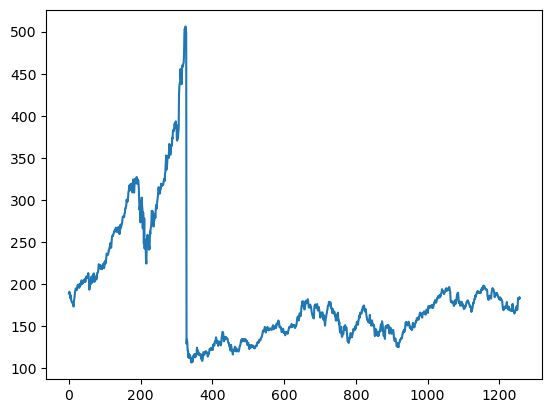

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [17]:
import numpy as np

In [18]:
df1

0       188.66
1       190.92
2       190.08
3       189.00
4       183.09
         ...  
1253    181.71
1254    182.40
1255    182.74
1256    184.57
1257    183.05
Name: close, Length: 1258, dtype: float64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1  # transformed between 0 to 1

array([[0.20493425],
       [0.21059487],
       [0.20849092],
       ...,
       [0.19010645],
       [0.19469004],
       [0.19088291]])

In [23]:
# for train test split we have to divide this accordingly because its a timeseries data since the successors prices off the stock highly dependes upon the previous stock pricing and various other parameters that had occured in past 
# so instead simple train test split we split it in this way (not random state)
# Timeseries data 

In [24]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [25]:
training_size,test_size

(817, 441)

In [26]:
train_data,test_data

(array([[2.04934252e-01],
        [2.10594865e-01],
        [2.08490920e-01],
        [2.05785848e-01],
        [1.90983093e-01],
        [1.99774577e-01],
        [1.90206637e-01],
        [1.82391985e-01],
        [1.80663745e-01],
        [1.78810269e-01],
        [1.76681277e-01],
        [1.78985598e-01],
        [1.70895429e-01],
        [1.66462116e-01],
        [1.82341891e-01],
        [1.89605510e-01],
        [1.96318096e-01],
        [2.08666249e-01],
        [2.14752661e-01],
        [2.20338134e-01],
        [2.18785222e-01],
        [2.18685034e-01],
        [2.15153413e-01],
        [2.18033813e-01],
        [2.29455229e-01],
        [2.28002505e-01],
        [2.31984972e-01],
        [2.30281778e-01],
        [2.29780839e-01],
        [2.22241703e-01],
        [2.32836569e-01],
        [2.32686287e-01],
        [2.28127740e-01],
        [2.37219787e-01],
        [2.40175329e-01],
        [2.44383219e-01],
        [2.43932373e-01],
        [2.33387602e-01],
        [2.3

In [30]:
# Now the X_train and y_train are distributed along time steps since the successors stock price is dependent on precedding prices and the timesteps helps us provide the output accordingly
# timesteps = 100 , so after 100 stock prices whats the output....
# for train and test both

In [31]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM (making 3d array form 2D array)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
#stacked lstm one layer after another
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))   #input shape 100,1 is -----> timestep and 1
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

12/12 [==============================] - 20s 495ms/step - loss: 0.0399 - val_loss: 5.4594e-04
Epoch 2/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0151 - val_loss: 0.0024
Epoch 3/100
12/12 [==============================] - 3s 212ms/step - loss: 0.0110 - val_loss: 4.2979e-04
Epoch 4/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0094 - val_loss: 8.8528e-04
Epoch 5/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0092 - val_loss: 3.7778e-04
Epoch 6/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0088 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0068 - val_loss: 3.0142e-04
Epoch 8/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0059 - val_loss: 0.0022
Epoch 9/100
12/12 [==============================] - 3s 217ms/step - loss: 0.0062 - val_loss: 8.7134e-04
Epoch 10/100
12/12 [==============================] - 2s 203ms/st

In [41]:
import tensorflow as tf

In [42]:
tf.__version__

'2.15.0'

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 33ms/step


In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

# for  root mean squared error matrix

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

102.28279192660713

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

103.63015237861308

In [57]:
# very less difference between rmse train & rmse test --- > model is rightly trained

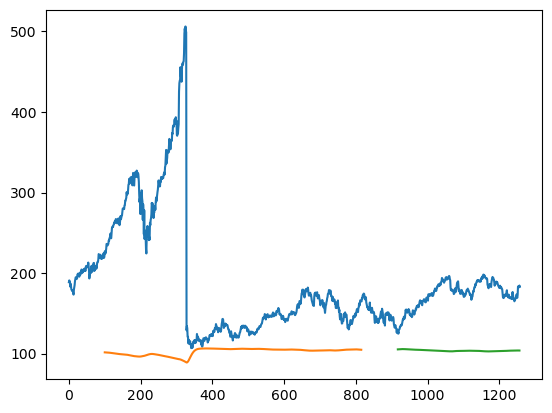

In [59]:
### Plotting 
# shift train predictions for plotting
look_back=100  #(time step)
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
len(test_data)

441

In [61]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

# for prediction of price with timestep=100 we have to see data 100 days back so 441-100=341

(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 0.21803381340012518,
 0.2212648716343143,
 0.21956167814652466,
 0.2187351283656856,
 0.21435190983093294,
 0.2126236693800876,
 0.2033813400125234,
 0.1942642454602379,
 0.2004257983719474,
 0.19789605510331865,
 0.20247964934251717,
 0.20653725735754536,
 0.20681277395115838,
 0.20408265497808387,
 0.2054101440200375,
 0.20115216030056354,
 0.19586725109580455,
 0.1936380713838447,
 0.19291170945522856,
 0.18902943018159046,
 0.18715090795241074,
 0.18905447714464613,
 0.19418910457107075,
 0.1895554164057608,
 

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[-0.00750657]
101
1 day input [ 0.22567314  0.22038823  0.22001252  0.21730745  0.21592987  0.21618034
  0.21725736  0.21462743  0.19737007  0.19388854  0.18802755  0.18619912
  0.19716969  0.19611772  0.19874765  0.19724483  0.19807138  0.19233563
  0.18995617  0.20485911  0.21219787  0.21803381  0.22126487  0.21956168
  0.21873513  0.21435191  0.21262367  0.20338134  0.19426425  0.2004258
  0.19789606  0.20247965  0.20653726  0.20681277  0.20408265  0.20541014
  0.20115216  0.19586725  0.19363807  0.19291171  0.18902943  0.18715091
  0.18905448  0.1941891   0.18955542  0.18614903  0.18983093  0.18680025
  0.1851221   0.18239198  0.17097057  0.15849718  0.15599249  0.15569192
  0.16002505  0.16508453  0.16628679  0.16102693  0.16571071  0.16475892
  0.16751409  0.17342517  0.17991234  0.16162805  0.16390733  0.16032561
  0.15747026  0.16648716  0.16190357  0.15827176  0.15529117  0.15731997
  0.15524108  0.15714465  0.15431434  0.15737007  0.15263619  0.17082029
  0.17460238  0.164934

20 day output [[0.90279734]]
21 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.94413203 0.93795931 0.92865342 0.91987926 0.91280973
 0.90777564 0.90473258 0

28 day output [[0.903272]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94413203
 0.93795931 0.92865342 0.91987926 0.91280973 0.90777564 0.90473258
 0.90339231 0.90332204 0.90403908 0.90509242 0.90611798 0.90686554
 0.90720606 0.90711629

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
import matplotlib.pyplot as plt

In [67]:
len(df1)

1258

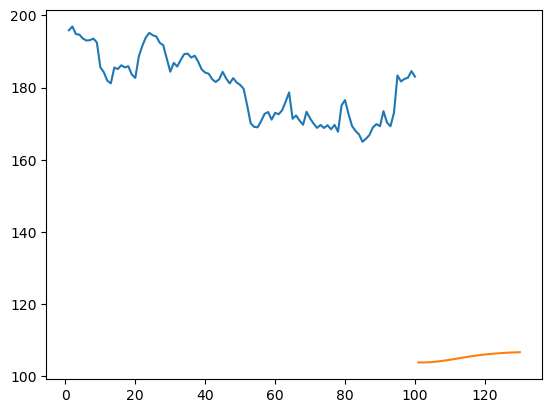

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

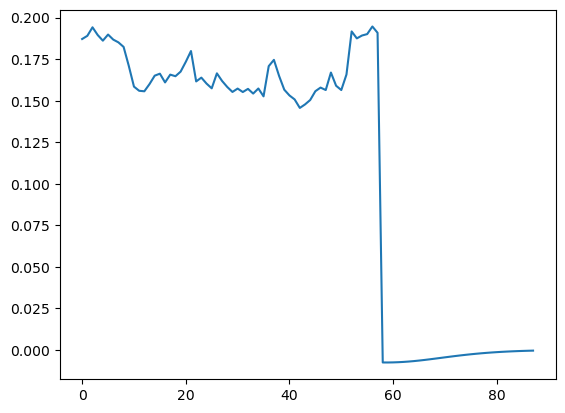

In [69]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [70]:
df3=scaler.inverse_transform(df3).tolist()

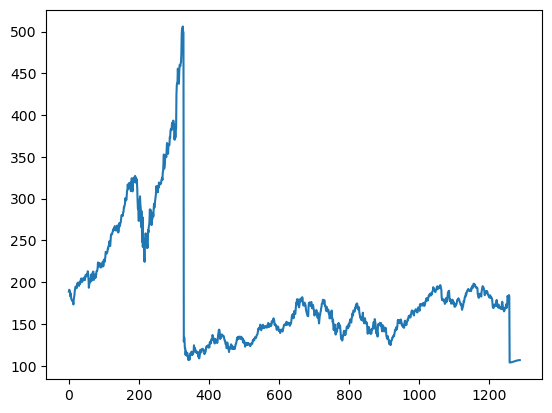

In [71]:
plt.plot(df3)